
# 📊 Automação e Análise de Dados de Contratos e Convênios

Este notebook demonstra como automatizar a **coleta, o tratamento e a análise** de dados de contratos e convênios disponibilizados pela plataforma **Ceará Transparente**.

**Objetivos:**
- Coletar dados via API.
- Estruturar e armazenar os dados.
- Analisar e visualizar as informações.
- Exportar resultados tratados.
- Enviar automaticamente por e-mail todos os dias.


## 1️⃣ Importação de Bibliotecas

In [14]:

import requests        # Para consumir a API
import pandas as pd    # Para manipulação e análise de dados
import matplotlib.pyplot as plt  # Para criar gráficos


## 2️⃣ Coleta de Dados via API

In [15]:

# URL da API do Ceará Transparente (exemplo hipotético)
URL_API = "https://api-dados-abertos.cearatransparente.ce.gov.br/transparencia/contratos/contratos?page=20&data_assinatura_inicio=01%2F01%2F2024&data_assinatura_fim=01%2F01%2F2025"

# Fazendo a requisição dos dados
response = requests.get(URL_API)

# Verificando se a resposta foi bem-sucedida
if response.status_code == 200:
    dados = response.json()  # Converte o resultado para um dicionário
    print("✅ Conexão com a API realizada com sucesso!")
else:
    print(f"❌ Erro ao acessar API: {response.status_code}")


✅ Conexão com a API realizada com sucesso!


## 3️⃣ Transformação dos Dados em DataFrame

In [16]:

# Converte os dados para um DataFrame do Pandas
dados_df = pd.json_normalize(dados['data'])

# Exibe as primeiras 5 linhas para conferir o carregamento
dados_df.head()


,id,cod_concedente,cod_financiador,cod_gestora,cod_orgao,cod_secretaria,descricao_modalidade,descricao_objeto,descricao_tipo,descricao_url,...,data_inicio,data_rescisao,confidential,gestor_contrato,data_finalizacao_prestacao_contas,sequential,emergency,law,has_non_profit_transfer,nome_fiscal
0,543391,241291,884211,241291,24200214,24000000,PREGÃO ELETRÔNICO,Aquisição de medicamentos através da ATA.2023/...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,2024-02-19T00:00:00.000-03:00,None,False,None,None,2450,False,None,None,None
1,542546,240001,840314,240401,24200004,24000000,PREGÃO ELETRÔNICO,"AQUISIÇÃO DO MEDICAMENTO SITAGLIPTINA FOSFATO,...",DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,2024-02-19T00:00:00.000-03:00,None,False,None,None,1668,False,None,None,None
2,543442,241291,804465,241291,24200214,24000000,PREGÃO ELETRÔNICO,Aquisição de medicamentos por meio da Ata nº 2...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,2024-02-19T00:00:00.000-03:00,None,False,None,None,2501,False,None,None,None
3,542547,240001,838184,240401,24200004,24000000,PREGÃO ELETRÔNICO,"AQUISIÇÃO DE ALGODAO, PH ENTRE 5.0 E 8.0 COM P...",DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,2024-02-19T00:00:00.000-03:00,None,False,None,None,1669,False,None,None,None
4,548446,241291,922870,241291,24200214,24000000,PREGÃO ELETRÔNICO,Aquisição de material medico hospitalar de aco...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,...,2024-02-19T00:00:00.000-03:00,None,False,None,None,7290,False,None,None,None


## 4️⃣ Análise Exploratória de Dados (AED)

In [17]:

# Mostra estatísticas descritivas dos valores de contrato
dados_df["valor_contrato"].describe()


count        100
unique       100
top       1200.0
freq           1
Name: valor_contrato, dtype: object

## 5️⃣ Visualização dos Dados

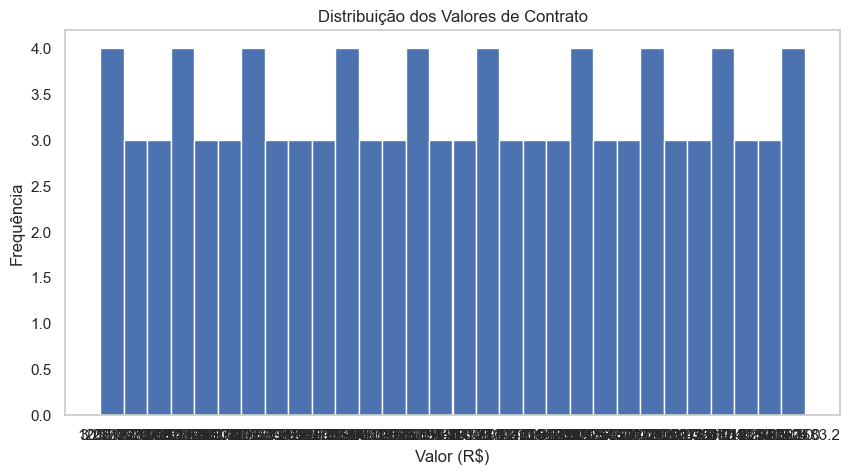

In [18]:

# Gera um histograma da distribuição de valores de contrato
plt.figure(figsize=(10, 5))
plt.hist(dados_df ["valor_contrato"], bins=30)
plt.title("Distribuição dos Valores de Contrato")
plt.xlabel("Valor (R$)")
plt.ylabel("Frequência")
plt.grid()
plt.show()


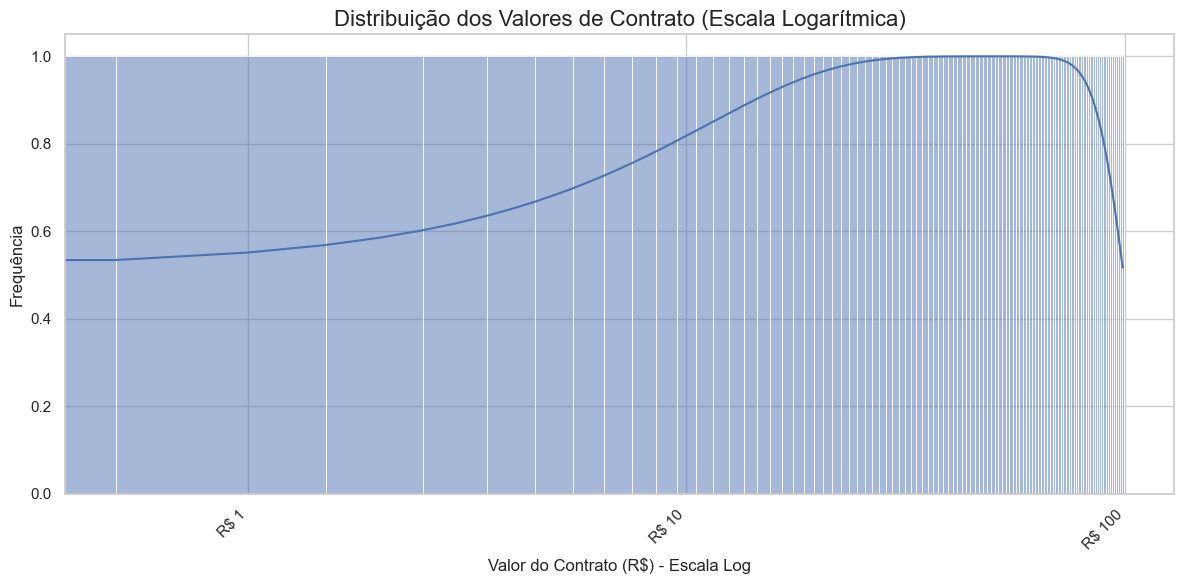

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Define o estilo
sns.set_theme(style="whitegrid")

# Cria a figura
plt.figure(figsize=(12, 6))

# Gera o histograma
ax = sns.histplot(dados_df["valor_contrato"], bins=30, kde=True)

# **A MUDANÇA PRINCIPAL: APLICA A ESCALA LOGARÍTMICA**
ax.set_xscale('log')

# Títulos e rótulos
plt.title("Distribuição dos Valores de Contrato (Escala Logarítmica)", fontsize=16)
plt.xlabel("Valor do Contrato (R$) - Escala Log", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

# Formata o eixo X para mostrar os valores em R$ em vez de notação científica
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('R$ {x:,.0f}'))
plt.xticks(rotation=45, ha='right')

# Garante que tudo caiba na imagem e salva
plt.tight_layout()
plt.savefig("histograma_log.png")

# Mostra o gráfico
# plt.show()

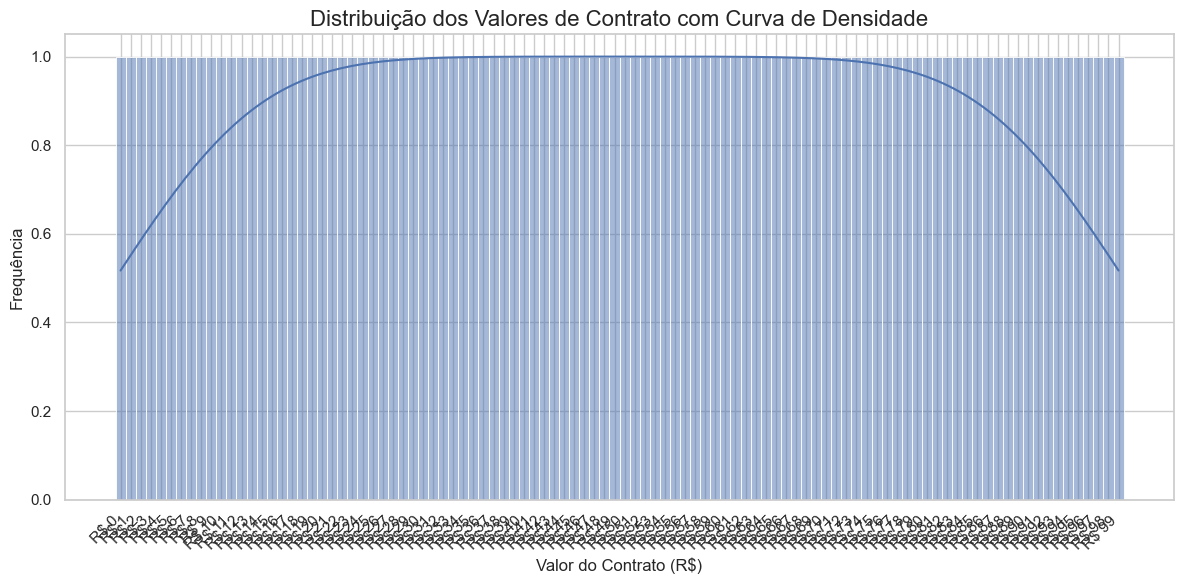

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Define um estilo mais moderno para os gráficos
sns.set_theme(style="whitegrid")

# Cria a figura
plt.figure(figsize=(12, 6))

# Gera o histograma com a curva de densidade (KDE)
sns.histplot(dados_df["valor_contrato"], bins=30, kde=True)

# Títulos e rótulos
plt.title("Distribuição dos Valores de Contrato com Curva de Densidade", fontsize=16)
plt.xlabel("Valor do Contrato (R$)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

# Formata o eixo X para ter separador de milhar
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('R$ {x:,.0f}'))
plt.xticks(rotation=45, ha='right')

# Garante que tudo caiba na imagem e salva
plt.tight_layout()
plt.savefig("histograma_seaborn.png")

# Mostra o gráfico
# plt.show()

## 6️⃣ Exportação dos Dados Tratados

In [21]:

# Salva os dados tratados em CSV
dados_df .to_csv("contratos_tratados.csv", index=False)
print("📂 Arquivo 'contratos_tratados.csv' salvo com sucesso!")


📂 Arquivo 'contratos_tratados.csv' salvo com sucesso!


## 7️⃣ Envio Automático de Relatório por E-mail

In [22]:

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import os

# --- CONFIGURAÇÕES DO E-MAIL ---
EMAIL_REMETENTE = "artenio.reis@gmail.com"
SENHA_REMETENTE = "notj kuab ldzn gtzi"  # Use senha de app, não a senha normal!
EMAIL_DESTINATARIO = "artenioreis@live.com"

# --- CRIAÇÃO DA MENSAGEM ---
mensagem = MIMEMultipart()
mensagem['From'] = EMAIL_REMETENTE
mensagem['To'] = EMAIL_DESTINATARIO
mensagem['Subject'] = "📊 Relatório Diário de Contratos e Convênios"

corpo = """
<p>Olá,</p>
<p>Segue em anexo o relatório diário de contratos e convênios extraídos da plataforma Ceará Transparente.</p>
<p>Atenciosamente,<br>Artenio Reis</p>
"""

mensagem.attach(MIMEText(corpo, 'html'))

# --- ANEXANDO O CSV GERADO ---
arquivo = "contratos_tratados.csv"
with open(arquivo, "rb") as anexo:
    parte = MIMEBase('application', 'octet-stream')
    parte.set_payload(anexo.read())
    encoders.encode_base64(parte)
    parte.add_header('Content-Disposition', f'anexo; filename={os.path.basename(arquivo)}')
    mensagem.attach(parte)

# --- ENVIO DO E-MAIL ---
try:
    with smtplib.SMTP('smtp.gmail.com', 587) as servidor:
        servidor.starttls()
        servidor.login(EMAIL_REMETENTE, SENHA_REMETENTE)
        servidor.send_message(mensagem)
        print("✅ E-mail enviado com sucesso!")
except Exception as e:
    print(f"❌ Erro ao enviar e-mail: {e}")


✅ E-mail enviado com sucesso!



## ✅ Conclusão

- A coleta de dados foi realizada com sucesso via API.
- Os dados foram estruturados em um DataFrame, analisados e visualizados.
- Um arquivo CSV com os dados tratados foi gerado para uso posterior.
- O relatório foi enviado automaticamente por e-mail para os responsáveis.
- Para execução diária, configure o agendamento no Windows (Task Scheduler) ou Linux (cron).
